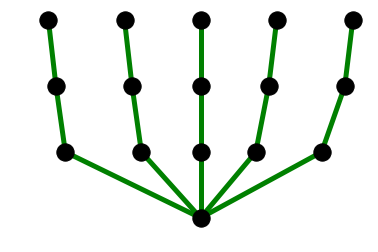

In [7]:
%config IPCompleter.greedy=True
%matplotlib inline
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout, to_agraph
import matplotlib.pyplot as plt
from copy import deepcopy
class Graph:
    def __init__(self):
        self.nodecolors = {}
        self.G = nx.DiGraph()
    
    def drawGraph(self):
        plt.gca().invert_yaxis()
        pos =graphviz_layout(self.G, prog='dot')
        edges = self.G.edges()
        nx.draw(self.G, pos, with_labels=False, arrows=False, edge_color='green', node_color='black', width=5)

    def add_edge(self, From, To, color='green'):
        self.G.add_edge(From,To)

    def createGraph(self):
        self.G.add_node("ROOT")
        for i in range(5):
            self.G.add_node("Child_%i" % i)
            self.G.add_node("Grandchild_%i" % i)
            self.G.add_node("Greatgrandchild_%i" % i)
            self.add_edge("ROOT", "Child_%i" % i,'g')
            self.add_edge("Child_%i" % i, "Grandchild_%i" % i,'g')
            self.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i,'g')
    
    def remove_node(self,node):
        if node in self.G.nodes():
            nodes = deepcopy(self.G[node])
            for v in nodes:
                self.remove_edge(node,v)
            self.G.remove_node(node)
        
    
    def remove_edge(self,From,To):
        if From in self.G and To in self.G[From]:
            self.G.remove_edge(From,To)
            self.nodecolors[From].pop(To,None)
            self.remove_node(To)
        

G = Graph()            
G.createGraph()
G.drawGraph()

In [4]:
G.G["ROOT"]

AtlasView({'Child_0': {}, 'Child_1': {}, 'Child_3': {}, 'Child_4': {}, 'Child_2': {}})